In [1]:
### INITIALISATION ###

import numpy as np          # fundamental package for scientific computing
import xarray as xr         # data handling
import gsw                  # compute potential density
import xgcm                 # eos function doesn't work without this
import pop_tools            # to mask region of interest
import matplotlib.pyplot as plt

salt_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/salt/salt_'
temp_path = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/temp/temp_'

file_name= '1001.001.nc'

grid_name = 'POP_gx1v7'

#setting up of regional mask
region_defs = {
    'NorthAtlantic':[{'match': {'REGION_MASK': [6]}}],
    'LabradorSea': [{'match': {'REGION_MASK': [8]}}],
    'MediterraneanSea': [{'match': {'REGION_MASK': [7]}}]} 
mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs, mask_name='North Atlantic')
mask3d = mask3d.sum('region')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
### COMPUTATION ###

### load data
ds = xr.open_dataset(salt_path+file_name).isel(time=0)#.where(mask3d == 1)
ds_temp = xr.open_dataset(temp_path+file_name).isel(time=0)#.where(mask3d == 1)
# add temp to ds
ds = ds.update(ds_temp[["TEMP"]])

ds = ds.roll(nlon=-80)

### Compute in situ density
ds['RHO'] = pop_tools.eos(ds.SALT, ds.TEMP, depth=(ds.z_t*1e-2))
ds['RHO'] = ds.RHO - 1000
ds['RHO'].attrs['units'] = 'kg/m^3 - 1000'
ds['RHO'].attrs['long_name'] = 'In-situ Density'

### Compute potential density ref 2000dbar
# Conservative Temperature
CT = gsw.conversions.CT_from_pt(ds.SALT, ds.TEMP)
# potential density
ds['SIGMA_2'] = gsw.density.sigma2(ds.SALT, CT)
ds['SIGMA_2'].attrs['units'] = 'kg/m^3 - 1000'
ds['SIGMA_2'].attrs['long_name'] = 'Potential Density at 2000 dbar'
### Compute otential density  at reference pressure of 0 dbar
ds['SIGMA_0'] = gsw.density.sigma0(ds.SALT, CT)
ds['SIGMA_0'].attrs['units'] = 'kg/m^3 - 1000'
ds['SIGMA_0'].attrs['long_name'] = 'Potential Density at 0 dbar'

/home/innag3580/.conda/envs/cartopy/lib/python3.10/site-packages/xarray/core/computation.py:771: RuntimeWarning: invalid value encountered in ct_from_pt
  result_data = func(*input_data)


Plot longitudinal crosssection
- in-situ density
- potential density ref 2000dbar
- potential density ref 0dbar

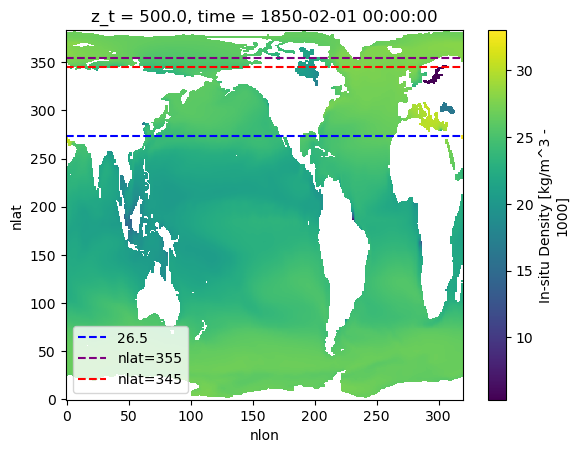

In [3]:
ds.RHO.isel(z_t=0).plot()
plt.axhline(y=274, color='blue', linestyle='--', label='26.5')
plt.axhline(y=355, color='purple', linestyle='--', label='nlat=355')
plt.axhline(y=345, color='red', linestyle='--', label='nlat=345')
plt.legend(loc='lower left')
plt.show()

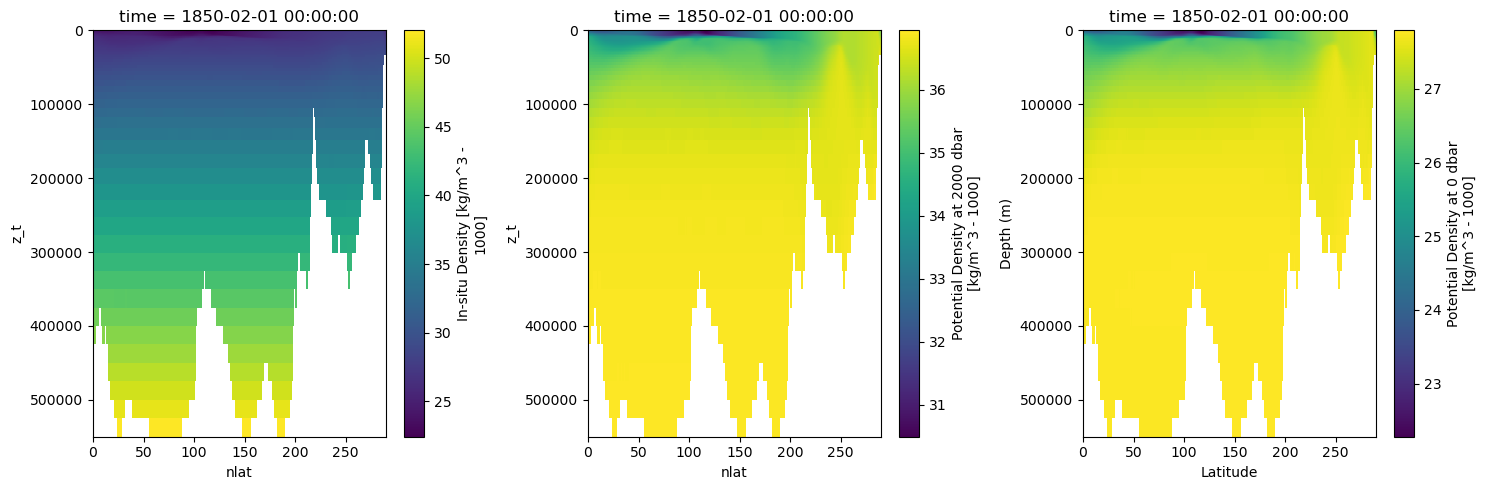

In [14]:
# Create subplots for the three variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust the figsize as needed

# Plot each variable in the Atlantic cross-section
ds.RHO.isel(nlon=250, nlat=slice(80,370)).plot(ax=axes[0], yincrease=False)
ds.SIGMA_2.isel(nlon=250, nlat=slice(80,370)).plot(ax=axes[1], yincrease=False)
ds.SIGMA_0.isel(nlon=250, nlat=slice(80,370)).plot(ax=axes[2], yincrease=False)


# Add labels and adjust layout
plt.xlabel('Latitude')
plt.ylabel('Depth (m)')
plt.tight_layout()

# Show the plot
plt.show()

Plot crosssection at 26.5
- in-situ density
- potential density ref 2000dbar
- potential density ref 0dbar

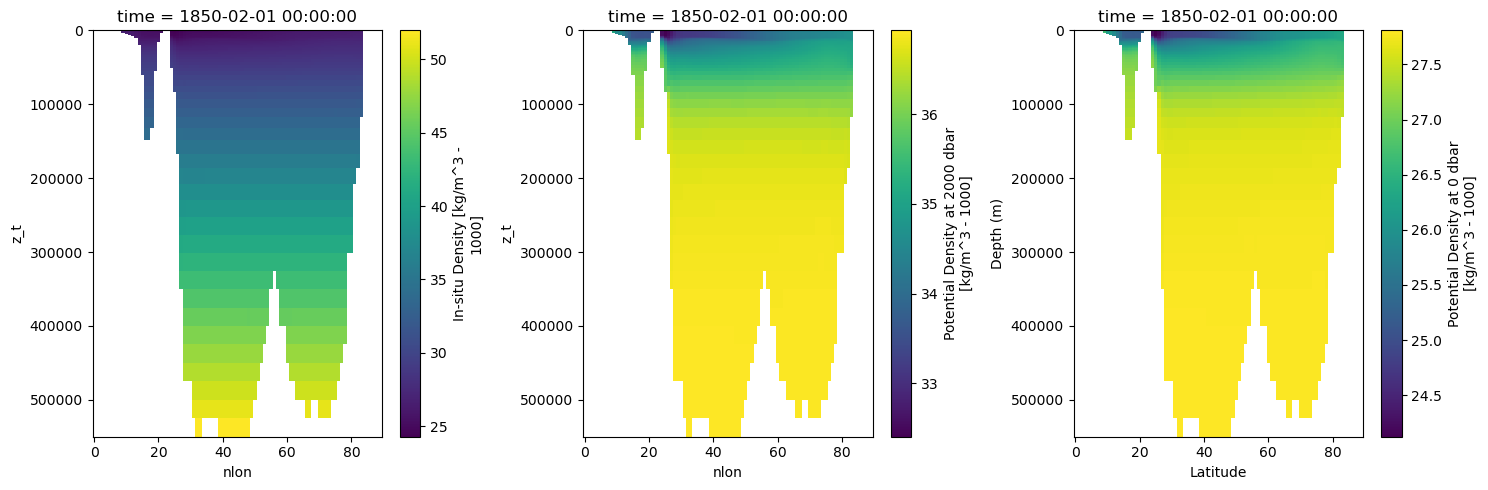

In [15]:
# Create subplots for the three variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust the figsize as needed

# Plot each variable in the Atlantic cross-section
ds.RHO.isel(nlat=274, nlon=slice(180, 270)).plot(ax=axes[0], yincrease=False)
ds.SIGMA_2.isel(nlat=274, nlon=slice(180, 270)).plot(ax=axes[1], yincrease=False)
ds.SIGMA_0.isel(nlat=274, nlon=slice(180, 270)).plot(ax=axes[2], yincrease=False)

# Add labels and adjust layout
plt.xlabel('Latitude')
plt.ylabel('Depth (m)')
plt.tight_layout()

# Show the plot
plt.show()

Plot crosssection at nlat=355
- in-situ density
- potential density ref 2000dbar
- potential density ref 0dbar

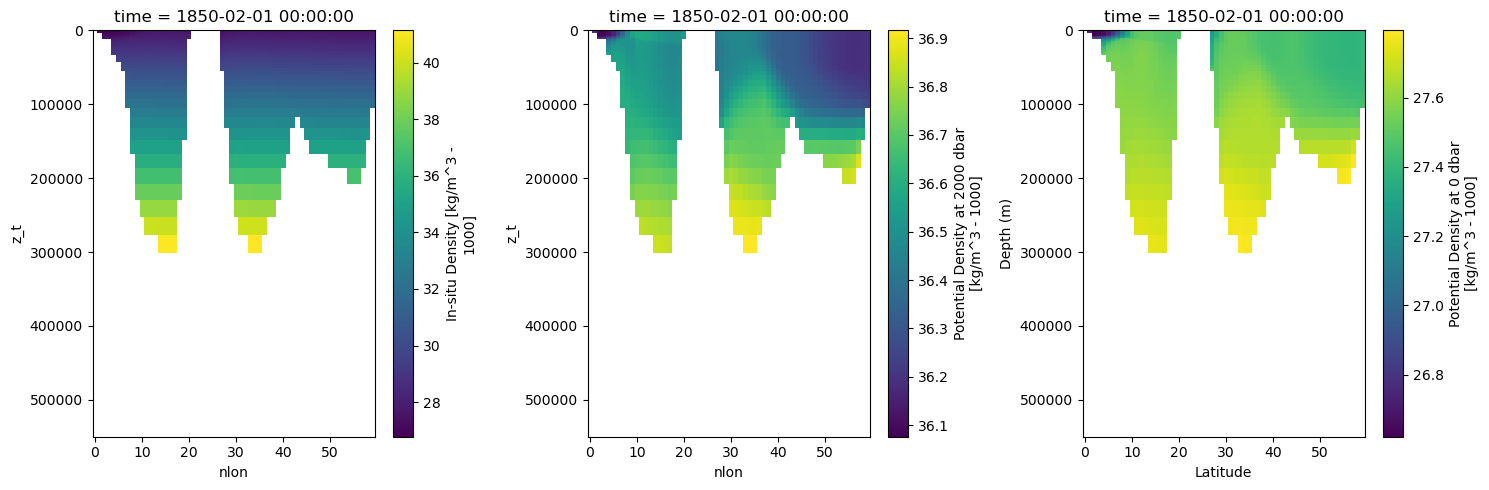

In [21]:
nlat = 355
nlon = slice(210, 270)

# Create subplots for the three variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust the figsize as needed

# Plot each variable in the Atlantic cross-section
ds.RHO.isel(nlat=nlat, nlon=nlon).plot(ax=axes[0], yincrease=False)
ds.SIGMA_2.isel(nlat=nlat, nlon=nlon).plot(ax=axes[1], yincrease=False)
ds.SIGMA_0.isel(nlat=nlat, nlon=nlon).plot(ax=axes[2], yincrease=False)

# Add labels and adjust layout
plt.xlabel('Latitude')
plt.ylabel('Depth (m)')
plt.tight_layout()

# Show the plot
plt.show()

Plot crosssection at nlat=345
- in-situ density
- potential density ref 2000dbar
- potential density ref 0dbar

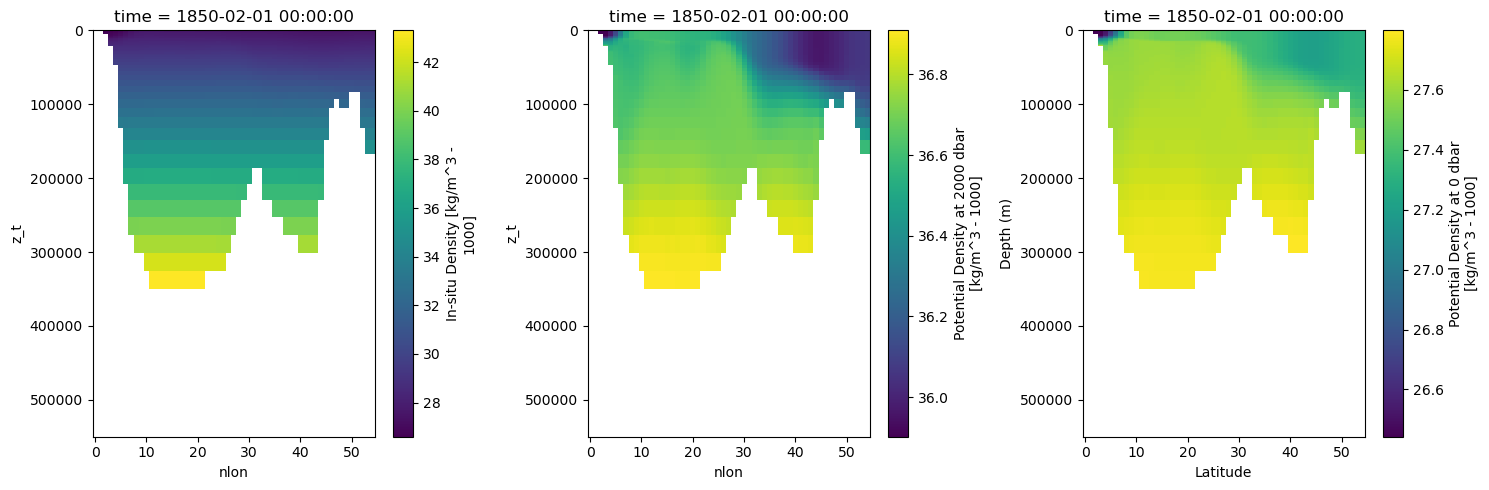

In [23]:
nlat = 345
nlon = slice(215, 270)

# Create subplots for the three variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust the figsize as needed

# Plot each variable in the Atlantic cross-section
ds.RHO.isel(nlat=nlat, nlon=nlon).plot(ax=axes[0], yincrease=False)
ds.SIGMA_2.isel(nlat=nlat, nlon=nlon).plot(ax=axes[1], yincrease=False)
ds.SIGMA_0.isel(nlat=nlat, nlon=nlon).plot(ax=axes[2], yincrease=False)

# Add labels and adjust layout
plt.xlabel('Latitude')
plt.ylabel('Depth (m)')
plt.tight_layout()

# Show the plot
plt.show()